### Preparação do ambiente e importação de bibliotecas

In [1]:
import gdown

url1 = 'https://drive.google.com/uc?id=1v-OK4cJqSF4dcheIQlK1-W6JPbOpV44j'
output1 = 'books.csv'
gdown.download(url1, output1, quiet=False)

url2 = 'https://drive.google.com/uc?id=1-gmeMK-PmZe6rYAQPvXKdUXfD01uIbsd'
output2 = 'reviews.csv'
gdown.download(url2, output2, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1v-OK4cJqSF4dcheIQlK1-W6JPbOpV44j
From (redirected): https://drive.google.com/uc?id=1v-OK4cJqSF4dcheIQlK1-W6JPbOpV44j&confirm=t&uuid=f7feb7a8-7415-4499-83fe-5ee5d1056587
To: /content/books.csv
100%|██████████| 2.85G/2.85G [00:44<00:00, 63.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-gmeMK-PmZe6rYAQPvXKdUXfD01uIbsd
From (redirected): https://drive.google.com/uc?id=1-gmeMK-PmZe6rYAQPvXKdUXfD01uIbsd&confirm=t&uuid=6906fdeb-d75a-41b0-9ea9-d7e80a88ba3f
To: /content/reviews.csv
100%|██████████| 181M/181M [00:01<00:00, 159MB/s]


'reviews.csv'

In [2]:
# O Google Colab costuma ter a maior parte destas biliotecas já instaladas
# porém, dependendo do ambiente em que estiver executando, elas não existam
!pip install pandas matplotlib seaborn gensim transformers nltk

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

### Limpeza e Análise Exploratória dos Dados dos dois dataframes

In [4]:
books = pd.read_csv('books.csv')
reviews = pd.read_csv('reviews.csv')

In [5]:
books.head()

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
reviews.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [9]:
books.describe()

,Price,score,time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [10]:
reviews.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [11]:
# Verificar valores ausentes
print("Valores ausentes em books.csv:", books.isnull().sum())
print("Valores ausentes em reviews.csv:", reviews.isnull().sum())

Valores ausentes em books.csv: Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64
Valores ausentes em reviews.csv: Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


### Unificando os dataframes com base no título

In [12]:
reviews = reviews.dropna(subset=['Title'])
books = books.dropna(subset=['Title'])

In [13]:
# Função para normalizar títulos
def normalize_title(title):
    title = title.lower() # Convertendo para minúsculas
    title = re.sub(r'[^a-z0-9\s]', '', title)  # Removendo caracteres especiais
    title = re.sub(r'\s+', ' ', title).strip()  # Removendo espaços extras
    return title

# Normalizando os títulos em ambos os DataFrames
books['Normalized_Title'] = books['Title'].apply(normalize_title)
reviews['Normalized_Title'] = reviews['Title'].apply(normalize_title)

# Mesclando os DataFrames com base nos títulos normalizados
df = pd.merge(books, reviews, left_on='Normalized_Title', right_on='Normalized_Title', suffixes=('_books', '_reviews'))

# Removendo colunas duplicadas e ajustando o DataFrame final
df = df.drop(columns=['Normalized_Title'])

# Visualizando o DataFrame resultante
df.head()

,Id,Title_books,Price,User_id,profileName,score,time,summary,text,Title_reviews,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


### Fazendo novas análises no Dataframe completo

In [14]:
# Contagem de valores únicos para verificar a diversidade nas colunas categóricas
df.nunique()

Id                221989
Title_books       212403
Price               6004
User_id          1008961
profileName       854140
score                  5
time                6272
summary          1592298
text             2062627
Title_reviews     212403
description       133226
authors           127277
image             149386
previewLink       188098
publisher          16016
publishedDate      11582
infoLink          184505
categories         10883
ratingsCount         478
dtype: int64

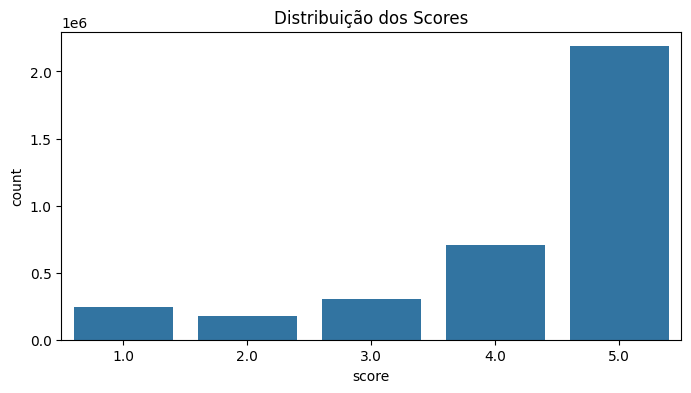

In [15]:
# Análise da distribuição dos scores
plt.figure(figsize=(8, 4))
sns.countplot(x='score', data=df)
plt.title('Distribuição dos Scores')
plt.show()

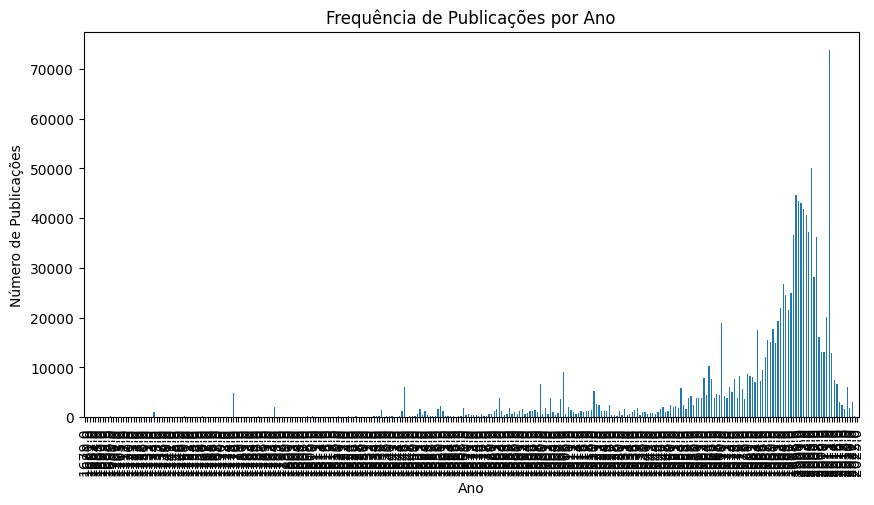

In [16]:
# Análise da frequência de publicações por ano
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce').dt.year  # Convertendo para formato de ano
plt.figure(figsize=(10, 5))
df['publishedDate'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequência de Publicações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.show()

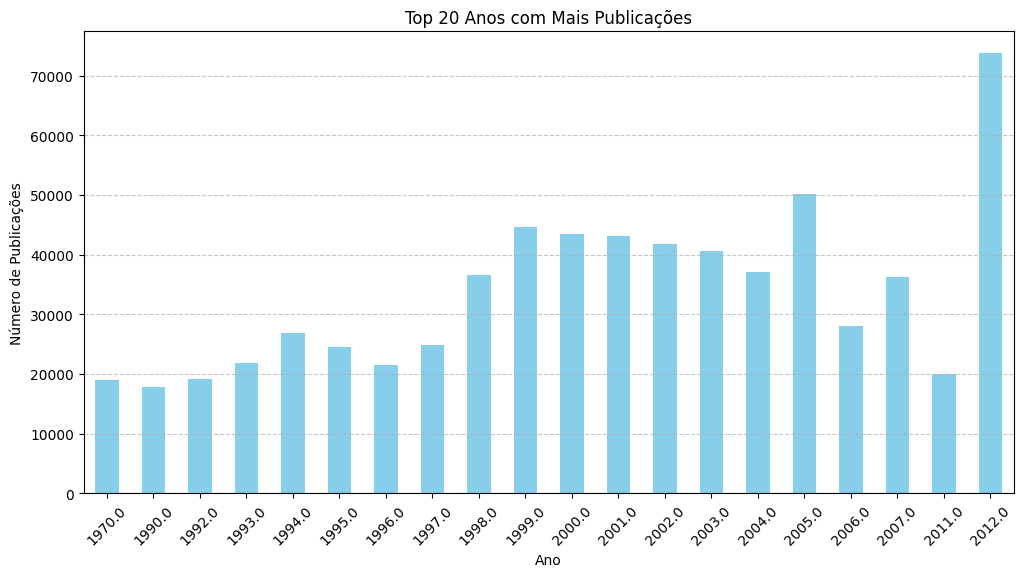

In [17]:
year_counts = df['publishedDate'].value_counts().sort_values(ascending=False)

# Limitar para os top 15 anos com mais publicações
top_years = year_counts.head(20)

# Plotar os dados
plt.figure(figsize=(12, 6))
top_years.sort_index().plot(kind='bar', color='skyblue')
plt.title('Top 20 Anos com Mais Publicações')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

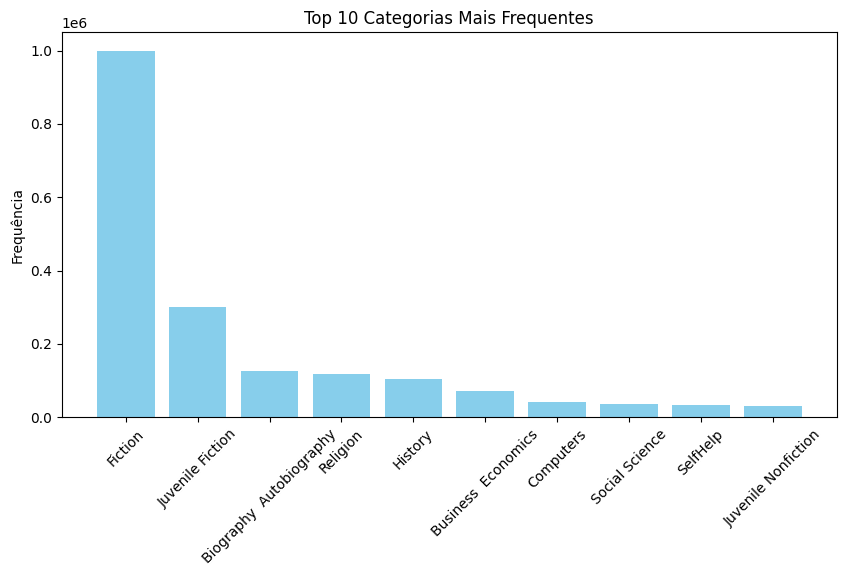

In [18]:
from gensim.corpora import Dictionary

# Análise das categorias mais frequentes
# Considerando que as categorias estão em uma lista dentro da coluna categories
categories = [[category] for category in df['categories'].dropna()]

def clean_categories(categories):
    cleaned_categories = []
    for category_list in categories:
        cleaned_list = []
        for category in category_list:
            # Remove special characters and symbols
            cleaned_category = re.sub(r'[^a-zA-Z0-9 ]', '', category)
            # Convert to unicode
            cleaned_list.append(cleaned_category)
        cleaned_categories.append(cleaned_list)
    return cleaned_categories

categories = clean_categories(categories)

# Criando um dicionário Gensim a partir das categorias
dictionary = Dictionary(categories)

# Convertendo as listas de categorias em bolsa de palavras (bag-of-words)
corpus = [dictionary.doc2bow(doc) for doc in categories]

# Contando frequências
category_counts = {}
for doc in corpus:
    for id, freq in doc:
        category = dictionary[id]
        if category in category_counts:
            category_counts[category] += freq
        else:
            category_counts[category] = freq

# Ordenando categorias por frequência
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Pegando as top 10
top_categories = sorted_categories[:10]
categories, counts = zip(*top_categories)

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.bar(categories, counts, color='skyblue')
plt.title('Top 10 Categorias Mais Frequentes')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

In [19]:
df.head()

,Id,Title_books,Price,User_id,profileName,score,time,summary,text,Title_reviews,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996.0,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


### Análise de Sentimento feita pela LLM Hugging Face

In [ ]:
# Inicializar a pipeline com o modelo bert-base
classifier = pipeline('sentiment-analysis', model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Stopwords pré-carregadas
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Conversão direta para string
    text = str(text)
    # Tokenização
    tokens = word_tokenize(text)
    # Remoção de stopwords e lematização
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tokens if w.lower() not in stop_words])
    return lemmatized_output

df['processed_text'] = df['text'].map(preprocess_text)


In [36]:
df.head()

,Id,Title_books,Price,User_id,profileName,score,time,summary,text,Title_reviews,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,processed_text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996.0,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,Julie Strain fan . 's collection photo -- 80 p...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,n't care much Dr. Seuss reading Philip Nel 's ...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,"people become book read `` child father man , ..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,"Theodore Seuss Geisel ( 1904-1991 ) , aka & qu..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaN,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,Philip Nel - Dr. Seuss : American IconThis bas...


In [38]:
df['processed_text'] = df['processed_text'].str[:512]

In [ ]:
df['sentiment'] = classifier(df['processed_text'].tolist())

In [ ]:
from google.colab import files

# Salvar como CSV
df.to_csv('df_hface.csv', index=False)

# Download do arquivo CSV
files.download('df_hface.csv')

#### Ranqueando autores

In [ ]:
# Agrupar por autor e calcular média dos scores e distribuição de sentimentos
author_stats = df.groupby('authors').agg({
    'score': 'mean',
    'sentiment': lambda x: x.value_counts(normalize=True)
}).sort_values(by='score', ascending=False)

# Mostrar top autores
author_stats.head(15)

#### Ranqueando gêneros

In [ ]:
# Explodir gêneros se estiverem em lista
df_exploded = df.explode('categories')

# Agrupar por gêneros e calcular médias e distribuição de sentimentos
genre_stats = df_exploded.groupby('categories').agg({
    'score': 'mean',
    'sentiment': lambda x: x.value_counts(normalize=True)
}).sort_values(by='score', ascending=False)

# Mostrar top gêneros
print(genre_stats.head(10))


#### Ranqueando usuários

In [ ]:
# Agrupar por usuário e analisar sentimentos
user_stats = df.groupby('profileName').agg({
    'sentiment': lambda x: x.value_counts(normalize=True)
}).sort_values(by=('sentiment', 'POSITIVE'), ascending=False)

# Mostrar top usuários com avaliações positivas
print(user_stats.head(10))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de plotagem: distribuição de scores por autor
plt.figure(figsize=(10, 6))
sns.barplot(x=author_stats['score'].head(10).index, y=author_stats['score'].head(10))
plt.title('Top 10 Autores por Score Médio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
merged_df.to_pickle("processed_reviews.pkl")

##### Suponha que queremos fazer uma ação de marketing de lançamento, com um avaliador que já tenha feito review de muitos livros de um determinado autor de forma positiva. Queremos ranquear os melhores para essa ação
